# K-means 클러스터링 실습

각 데이터 포인트와 각 그룹  평균 사이의 거리(Euclidean distance)를 구한 후 가장 가까운 클러스터로 배정하는 방법

##### 알고리즘

1. 그룹 평균 초기화: k번쨰 그룹의 평균을 $\mathbf m ^{(k)}$이라고 한다. 첫 과정은 각 그룹의 평균 $\mathbf m ^{(k)}$을 초기화 하는 것인데, 가장 기본적인 방법으로 랜덤으로 그룹의 평균을 설정한다.
2. 그룹 할당: 각 데이터 포인트와 가장 가까운 그룹 평균에 해당하는 그룹에 데이터 포인트를 할당한다. 
3. 평균 업데이트: 모든 데이터 포인트가 그룹에 속한 뒤, 각 그룹에 대한 새로운 평균값을 구한다.
4. 반복 : 2단계 즉, 기존의 클러스터와 새로 할당된 클러스터가 차이가 없을 때까지 2-3단계를 반복한다. 
---

평가는 군집 모델 성능 평가에 쓰이는 실루엣 스코어를 사용한다.

## 실루엣 스코어

_[7.6.4 군집 문제에서의 성능 평가] 단원 참조_

실루엣 스코어는 서로 다른 군집이 얼마나 잘 분리되는지 나타내는 지표이다. 같은 군집의 데이터는 가까운 거리에 뭉쳐있고, 다른 군집의 데이터끼리는 멀리 떨어져 있을수록 높은 점수를 나타낸다. 

-1부터 1사이의 값을 가지며, 스코어가 높을수록 좋은 성능을 의미한다.

$a$: 집단 내 데이터들과의 거리 평균(해당 포인트가 있는 집단), $b$: 두 번째로 가까운 다른 집단 내의 포인트들 과의 평균 거리

식으로 표현하면 이렇게 된다. 

$$ s = \frac {b - a}{\max (a, b)}$$

##### 11.2.2 임의로 데이터를 생성하여 클러스터링 해보는 실습.

# Data generating
## 임의 데이터 생성

In [1]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples = 100,     # 100개, 피처의 개수는 2, 5개의 그룹을 중심으로 샘플 데이터 생성
                 n_features = 2,
                 centers = 5,
                 random_state = 10)

## 생성된 데이터 차원 확인

In [2]:
print(X.shape)
print(y.shape)

(100, 2)
(100,)


피처 데이터는 2차원 데이터 100개가 생성되어있다. 타깃 데이터의 차원은 1차원 데이터가 100개 생성되어있는 상태. (100행 1열)

## unlabeled data plot

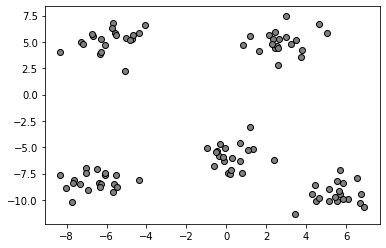

In [3]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1],       # 피처 1과 2가 각각 x, y축으로 스캐터플롯 그리기
           c = 'gray',
           edgecolor = 'black',
           marker = 'o')
plt.show()

# K-Means Clustering
## clustering

In [4]:
from sklearn.cluster import KMeans

kmc = KMeans(n_clusters = 5,        # k = 5, init = 첫 번째 평균값을 어떻게 정할지, max_iter = 최대 몇 번 반복할 것인지.
            init = 'random',
            max_iter = 100,
            random_state = 0)
kmc.fit(X)
label_kmc = kmc.labels_

In [5]:
# 각 데이터 포인트가 어디에 속하게 되었는지 확인

label_kmc

array([2, 4, 3, 1, 0, 2, 2, 3, 0, 2, 3, 2, 0, 1, 0, 2, 4, 1, 0, 2, 2, 1,
       4, 3, 2, 2, 1, 0, 3, 4, 1, 1, 0, 1, 2, 0, 3, 1, 3, 4, 1, 1, 1, 0,
       3, 3, 2, 0, 4, 0, 4, 0, 2, 3, 0, 0, 1, 4, 1, 3, 0, 4, 4, 1, 2, 4,
       0, 4, 0, 3, 3, 2, 4, 0, 1, 1, 3, 4, 2, 2, 0, 0, 4, 1, 4, 3, 1, 3,
       1, 3, 4, 3, 2, 4, 4, 4, 3, 2, 2, 3], dtype=int32)

## to data frame

In [6]:
# 시각화를 위해 데이터 프레임으로 만들어준다
import pandas as pd

kmc_columns = ['kmc_comp1', 'kmc_comp2']           # 피처 이름 
X_kmc_df = pd.DataFrame(X, columns = kmc_columns)  # 데이터 프레임 생성
X_kmc_df['target'] = y                             # 정답에 해당하는 데이터를 새로운 열로 추가
X_kmc_df['label_kmc'] = label_kmc                  # 클러스터링하여 정해진 라벨을 열에 추가
X_kmc_df.head(5)

,kmc_comp1,kmc_comp2,target,label_kmc
0,-5.577854,5.872988,3,2
1,1.627832,4.178069,1,4
2,-6.950884,-9.024594,4,3
3,-0.952769,-5.034316,2,1
4,6.550104,-7.912339,0,0


In [7]:
# 타깃 데이터의 이름 checking : 0, 1, 2, 3, 4
# set 함수는 python에서 데이터 리스트에서 유일값만 보여주는 함수 : set이라는 클래스로 출력된다.
print(set(X_kmc_df['target']))

# kmc 군집의 이름을 확인
print(set(X_kmc_df['label_kmc']))

{0, 1, 2, 3, 4}
{0, 1, 2, 3, 4}


## K-means 클러스터링을 이용한 데이터 플롯

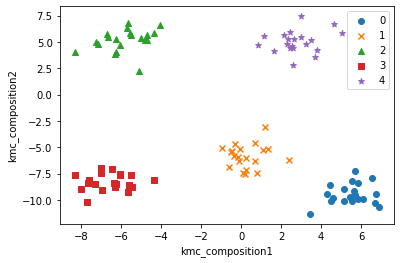

In [8]:
df = X_kmc_df
markers = ['o', 'x', '^', 's', '*']   # marker 리스트!

for i, mark in enumerate(markers):    # 5개 클러스터로 5개 마커 각각 대응되도록 정해준다.
    df_i = df[df['label_kmc'] == i]   # 라벨이 i인 클러스터 데이터들만 데리고
    target_i = i                      # 타깃 이름
    X1 = df_i['kmc_comp1']            # 각각 x축과 y축이 될 것
    X2 = df_i['kmc_comp2']
    plt.scatter(X1, X2, marker = mark, label = target_i) # 위의 정보들로 산점도를 그린다. 라벨은 각 i가 될 것

plt.xlabel('kmc_composition1')
plt.ylabel('kmc_composition2')
plt.legend()
plt.show()

## 실제 타깃 플롯

실제 타깃 데이터(정답 데이터)를 이용한 플롯을 확인한다.

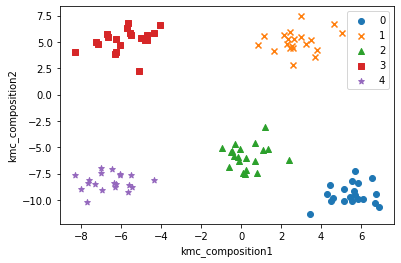

In [10]:
df = X_kmc_df
markers = ['o', 'x', '^', 's', '*']   # marker 리스트!

for i, mark in enumerate(markers):    # 5개 클러스터로 5개 마커 각각 대응되도록 정해준다.
    df_i = df[df['target'] == i]   # 라벨이 i인 클러스터 데이터들만 데리고
    target_i = i                      # 타깃 이름
    X1 = df_i['kmc_comp1']            # 각각 x축과 y축이 될 것
    X2 = df_i['kmc_comp2']
    plt.scatter(X1, X2, marker = mark, label = target_i) # 위의 정보들로 산점도를 그린다. 라벨은 각 i가 될 것

plt.xlabel('kmc_composition1')
plt.ylabel('kmc_composition2')
plt.legend()
plt.show()

~~아이 귀여워~~

# 모형 평가

클러스터링 모형 평가는 실루엣 스코어 함수를 사용한다. 

값은 피처 값과 모형을 통해 만들어진 라벨링 값을 넣어준다.

In [11]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(X, label_kmc)
print(sil_score)

0.7598181300128782


# 실험1: 중심 그룹 없이 난수 100개 생성

data shape:  (100, 2)
target shpae:  (100,)


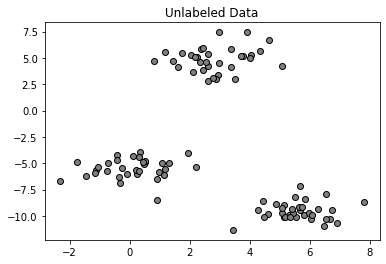

target names:  {0, 1, 2}
labeled names:  {0, 1, 2, 3, 4}


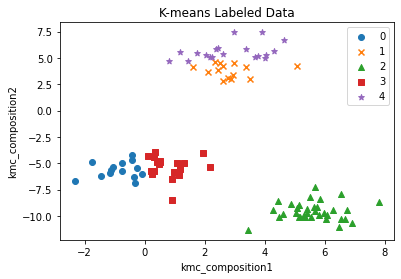

Silhouette score : 0.47242054295370445


In [12]:
# random data generating
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples = 100,     # 100개, 피처의 개수는 2, 중심 그룹 생략
                 n_features = 2,
                 random_state = 10)
# check the shape
print("data shape: ", X.shape)
print("target shpae: ", y.shape)

# unlabeled data visualizing
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1],       # 피처 1과 2가 각각 x, y축으로 스캐터플롯 그리기
           c = 'gray',
           edgecolor = 'black',
           marker = 'o')
plt.title("Unlabeled Data")
plt.show()

# K-Means
from sklearn.cluster import KMeans
kmc = KMeans(n_clusters = 5,        # k = 5, init = 첫 번째 평균값을 어떻게 정할지, max_iter = 최대 몇 번 반복할 것인지.
            init = 'random',
            max_iter = 100,
            random_state = 0)
kmc.fit(X)
label_kmc = kmc.labels_


# making dataframe for visualization
import pandas as pd
kmc_columns = ['kmc_comp1', 'kmc_comp2']           # 피처 이름 
X_kmc_df = pd.DataFrame(X, columns = kmc_columns)  # 데이터 프레임 생성
X_kmc_df['target'] = y                             # 정답에 해당하는 데이터를 새로운 열로 추가
X_kmc_df['label_kmc'] = label_kmc                  # 클러스터링하여 정해진 라벨을 열에 추가

# target(label)name checking
# set 함수는 python에서 데이터 리스트에서 유일값만 보여주는 함수 : set이라는 클래스로 출력된다.
print("target names: ", set(X_kmc_df['target']))
# kmc 군집의 이름을 확인
print("labeled names: ", set(X_kmc_df['label_kmc']))

# K-means-labeled data visualizing
df = X_kmc_df
markers = ['o', 'x', '^', 's', '*']   # marker 리스트!

for i, mark in enumerate(markers):    # 5개 클러스터로 5개 마커 각각 대응되도록 정해준다.
    df_i = df[df['label_kmc'] == i]   # 라벨이 i인 클러스터 데이터들만 데리고
    target_i = i                      # 타깃 이름
    X1 = df_i['kmc_comp1']            # 각각 x축과 y축이 될 것
    X2 = df_i['kmc_comp2']
    plt.scatter(X1, X2, marker = mark, label = target_i) # 위의 정보들로 산점도를 그린다. 라벨은 각 i가 될 것

plt.xlabel('kmc_composition1')
plt.ylabel('kmc_composition2')
plt.title("K-means Labeled Data")
plt.legend()
plt.show()

# scoring model
from sklearn.metrics import silhouette_score
sil_score = silhouette_score(X, label_kmc)
print("Silhouette score :", sil_score)

 어메이징한 데이터... 이다. 센터를 정하지 않았는데 왜 이렇게 되었을까 싶다. 물론 kmc 모델을 5개로 나누도록 한 것은 있긴 한데, 라벨을 정하지 않았는데 중심이 3개인 데이터들로 만들어졌다. 
 
 
 # 실험2: 난수 10000개 생성, k-means 모델의 cluster는 3으로

data shape:  (10000, 2)
target shpae:  (10000,)


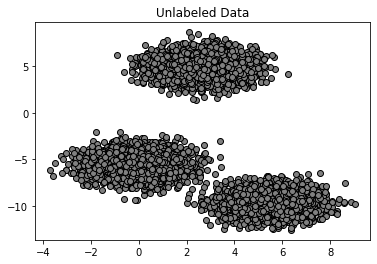

target names:  {0, 1, 2}
labeled names:  {0, 1, 2}


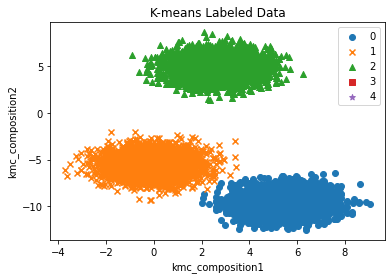

Silhouette score : 0.7725077396311187


In [13]:
 # random data generating
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples = 10000,     # 100개, 피처의 개수는 2, 중심 그룹 생략
                 n_features = 2,
                 random_state = 10)
# check the shape
print("data shape: ", X.shape)
print("target shpae: ", y.shape)

# unlabeled data visualizing
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1],       # 피처 1과 2가 각각 x, y축으로 스캐터플롯 그리기
           c = 'gray',
           edgecolor = 'black',
           marker = 'o')
plt.title("Unlabeled Data")
plt.show()

# K-Means
from sklearn.cluster import KMeans
kmc = KMeans(n_clusters = 3,        # k = 5, init = 첫 번째 평균값을 어떻게 정할지, max_iter = 최대 몇 번 반복할 것인지.
            init = 'random',
            max_iter = 100,
            random_state = 0)
kmc.fit(X)
label_kmc = kmc.labels_


# making dataframe for visualization
import pandas as pd
kmc_columns = ['kmc_comp1', 'kmc_comp2']           # 피처 이름 
X_kmc_df = pd.DataFrame(X, columns = kmc_columns)  # 데이터 프레임 생성
X_kmc_df['target'] = y                             # 정답에 해당하는 데이터를 새로운 열로 추가
X_kmc_df['label_kmc'] = label_kmc                  # 클러스터링하여 정해진 라벨을 열에 추가

# target(label)name checking
# set 함수는 python에서 데이터 리스트에서 유일값만 보여주는 함수 : set이라는 클래스로 출력된다.
print("target names: ", set(X_kmc_df['target']))
# kmc 군집의 이름을 확인
print("labeled names: ", set(X_kmc_df['label_kmc']))

# K-means-labeled data visualizing
df = X_kmc_df
markers = ['o', 'x', '^', 's', '*']   # marker 리스트!

for i, mark in enumerate(markers):    # 5개 클러스터로 5개 마커 각각 대응되도록 정해준다.
    df_i = df[df['label_kmc'] == i]   # 라벨이 i인 클러스터 데이터들만 데리고
    target_i = i                      # 타깃 이름
    X1 = df_i['kmc_comp1']            # 각각 x축과 y축이 될 것
    X2 = df_i['kmc_comp2']
    plt.scatter(X1, X2, marker = mark, label = target_i) # 위의 정보들로 산점도를 그린다. 라벨은 각 i가 될 것

plt.xlabel('kmc_composition1')
plt.ylabel('kmc_composition2')
plt.title("K-means Labeled Data")
plt.legend()
plt.show()

# scoring model
from sklearn.metrics import silhouette_score
sil_score = silhouette_score(X, label_kmc)
print("Silhouette score :", sil_score)

난수를 만들었는데 기본적으로 3개로 만들어지는게 마음에 들지 않는다. 

### Commentary

다른 데이터로 실험을 해봐야겠다. 했었던 경험은 자연어 처리 공부할 때 K-means를 사용했었던 기억이 있다. 각 문장들을 형태소 분석으로 나눈뒤 단어 임베딩을 한 후 임베딩된 상태의 해당 문장들을 PCA 진행하여 문장들을 벡터화 시킨후 문장들을 클러스터링을 진행했었을 때 사용했었다. 